tool: https://github.com/farizrahman4u/seq2seq

In [2]:
import pandas as pd
#from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import MinMaxScaler

In [3]:
import seq2seq
from seq2seq import AttentionSeq2Seq,SimpleSeq2Seq,Seq2Seq

Using TensorFlow backend.
/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/harrison/anaco

In [4]:
df = pd.read_csv('input/datafill.csv')
df['ds'] = pd.to_datetime(df['TIME'])
#df.index = pd.DatetimeIndex(df['ds'],name='index')
df['y'] = df['zhexi_in']
df.dropna()

,TIME,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add,ds,y
0,2015/1/1 0:00,180.475,67.00,0,0,0,2015-01-01 00:00:00,180.475
1,2015/1/1 1:00,206.634,65.00,0,0,0,2015-01-01 01:00:00,206.634
2,2015/1/1 2:00,200.758,66.00,0,0,0,2015-01-01 02:00:00,200.758
3,2015/1/1 3:00,183.565,66.00,0,0,0,2015-01-01 03:00:00,183.565
4,2015/1/1 4:00,167.910,66.00,0,0,0,2015-01-01 04:00:00,167.910
5,2015/1/1 5:00,179.350,65.00,0,0,0,2015-01-01 05:00:00,179.350
6,2015/1/1 6:00,162.501,66.00,0,0,0,2015-01-01 06:00:00,162.501
7,2015/1/1 7:00,148.392,65.00,0,0,0,2015-01-01 07:00:00,148.392
8,2015/1/1 8:00,170.659,66.00,0,0,0,2015-01-01 08:00:00,170.659
9,2015/1/1 9:00,152.862,65.00,0,0,0,2015-01-01 09:00:00,152.862


In [45]:
N = 3
M = 3
TS_LENGTH = 365 * 24
BATCH_SIZE = 16
SCALER = MinMaxScaler((-1,1))

def divide_ts_for_train_test(ts_start,ts_length):   
    scaler = SCALER
    ts = np.array(df['zhexi_in'][ts_start:ts_start+ts_length])
    ts_train = scaler.fit_transform(ts[:ts_length - M].reshape(-1,1))
    ts_test = scaler.transform(ts[-M:].reshape(-1,1))
    return ts_train,ts_test
def get_batch_samples(ts, batch_size = BATCH_SIZE, input_seq_len = N, output_seq_len = M):
    
    total_start_points = len(ts) - input_seq_len - output_seq_len
#     print(total_start_points)
    #print(start_idx)
    if(batch_size is 'all'):
        input_seq = [ts[i:(i+input_seq_len)] for i in range(total_start_points)]
        output_seq = [ts[(i+input_seq_len):(i+input_seq_len+output_seq_len)] for i in range(total_start_points)]
    else:
        start_idx = np.random.choice(range(total_start_points), batch_size)
        input_seq = [ts[i:(i+input_seq_len)] for i in start_idx]
        output_seq = [ts[(i+input_seq_len):(i+input_seq_len+output_seq_len)] for i in start_idx]

    return np.array(input_seq), np.array(output_seq)
ts_train,ts_test = divide_ts_for_train_test(100,TS_LENGTH)
x,y = get_batch_samples(ts_train,batch_size='all')
x.shape,y.shape

((8751, 3, 1), (8751, 3, 1))

In [46]:
model = AttentionSeq2Seq(input_shape=(N,1), hidden_dim=4, 
                         output_length=M, output_dim=1,depth=1,
                         dropout=0.3,bidirectional=True)

In [47]:
# import tensorflow as tf
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.733)  
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))  

(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 43s 6ms/step - loss: 0.1112 - val_loss: 0.0353
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0169 - val_loss: 0.0083
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0078 - val_loss: 0.0023
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0060 - val_loss: 0.0025
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0053 - val_loss: 0.0026
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 9/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0040 - val_loss: 0.0026

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 44s 6ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0028 - val_loss: 0.0010
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 9/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0029 - val_loss: 0.0014

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 44s 6ms/step - loss: 6.8079e-04 - val_loss: 0.0012
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 3.5464e-04 - val_loss: 0.0012
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 3.3207e-04 - val_loss: 0.0012
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 3.1266e-04 - val_loss: 0.0011
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.9775e-04 - val_loss: 0.0016e-0
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.9556e-04 - val_loss: 0.0015
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.8294e-04 - val_loss: 0.0019
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.8841e-04 - val_loss: 0.0019
Epoch 9/20
7000/7000 [==============================] - 15s 2ms/ste

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 45s 6ms/step - loss: 2.3903e-04 - val_loss: 0.0065
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.5210e-04 - val_loss: 0.0074
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4829e-04 - val_loss: 0.0074
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4257e-04 - val_loss: 0.0078
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4568e-04 - val_loss: 0.0078
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4486e-04 - val_loss: 0.0073
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4003e-04 - val_loss: 0.0083
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4741e-04 - val_loss: 0.0084
Epoch 9/20
7000/7000 [==============================] - 15s 2ms/step -

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 44s 6ms/step - loss: 0.0021 - val_loss: 1.5538e-04
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0015 - val_loss: 1.3868e-04
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0012 - val_loss: 1.3851e-04
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 8.9021e-04 - val_loss: 1.3887e-04
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 7.7420e-04 - val_loss: 1.3156e-04
Epoch 6/20
7000/7000 [==============================] - 16s 2ms/step - loss: 8.0342e-04 - val_loss: 1.3647e-04
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 8.3629e-04 - val_loss: 1.3382e-04
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 7.4158e-04 - val_loss: 1.2332e-04
Epoch 9/20
7000/7000 [============================

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 46s 7ms/step - loss: 6.1913e-04 - val_loss: 1.1099e-04
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 6.7555e-04 - val_loss: 1.0799e-04
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 7.2233e-04 - val_loss: 1.9072e-04
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 8.4013e-04 - val_loss: 1.1776e-04
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 6.8759e-04 - val_loss: 1.0625e-04
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 5.8161e-04 - val_loss: 1.1196e-04
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 6.1605e-04 - val_loss: 1.1293e-04
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 6.5589e-04 - val_loss: 1.0862e-04
Epoch 9/20
7000/7000 [================

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 47s 7ms/step - loss: 5.3593e-04 - val_loss: 2.6617e-04
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 6.4602e-04 - val_loss: 2.4520e-04
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 5.5645e-04 - val_loss: 1.7983e-04
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 7.5538e-04 - val_loss: 2.3441e-04
Epoch 5/20
7000/7000 [==============================] - 16s 2ms/step - loss: 5.6983e-04 - val_loss: 1.6809e-04
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 6.9595e-04 - val_loss: 1.6032e-04
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 6.4902e-04 - val_loss: 1.7170e-04
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 5.7305e-04 - val_loss: 2.1603e-04
Epoch 9/20
7000/7000 [================

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 49s 7ms/step - loss: 6.0518e-04 - val_loss: 1.8872e-04
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 5.3402e-04 - val_loss: 1.7650e-04
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 5.3355e-04 - val_loss: 2.0189e-04
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 6.4433e-04 - val_loss: 1.8585e-04
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.5560e-04 - val_loss: 1.9376e-04
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.8547e-04 - val_loss: 1.5734e-04
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 5.6170e-04 - val_loss: 2.0521e-04
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.8757e-04 - val_loss: 1.7501e-04
Epoch 9/20
7000/7000 [================

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 48s 7ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0018 - val_loss: 9.9602e-04
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 9/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0019 - val_loss: 0.

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 49s 7ms/step - loss: 8.7169e-04 - val_loss: 2.1329e-04
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.7868e-04 - val_loss: 1.2983e-04
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 5.4157e-04 - val_loss: 1.0364e-04
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.2387e-04 - val_loss: 1.0270e-04
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.4476e-04 - val_loss: 8.7960e-05
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 5.3588e-04 - val_loss: 9.1876e-05
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.6574e-04 - val_loss: 8.8276e-05
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.4824e-04 - val_loss: 1.0508e-04
Epoch 9/20
7000/7000 [================

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 51s 7ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0018 - val_loss: 0.0012

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 51s 7ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0014 - val_loss: 0.0014

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 52s 7ms/step - loss: 6.5807e-04 - val_loss: 1.9787e-04
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.0388e-04 - val_loss: 1.9520e-04
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 3.7529e-04 - val_loss: 1.6377e-04
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 3.9716e-04 - val_loss: 1.2804e-04
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 3.9640e-04 - val_loss: 1.0589e-04
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.2002e-04 - val_loss: 1.1496e-04
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 3.9192e-04 - val_loss: 1.3854e-04
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 3.3852e-04 - val_loss: 1.0530e-04
Epoch 9/20
7000/7000 [================

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 52s 7ms/step - loss: 2.5861e-04 - val_loss: 4.7661e-04
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4010e-04 - val_loss: 5.6716e-04
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4929e-04 - val_loss: 6.5045e-04
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.3632e-04 - val_loss: 8.7570e-04
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4061e-04 - val_loss: 7.9974e-04
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.4449e-04 - val_loss: 8.5758e-04
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.3787e-04 - val_loss: 9.5143e-04
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 2.3897e-04 - val_loss: 0.0014
Epoch 9/20
7000/7000 [====================

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 53s 8ms/step - loss: 0.0027 - val_loss: 9.7373e-04
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0021 - val_loss: 9.7647e-04
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0020 - val_loss: 9.8453e-04
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0019 - val_loss: 9.7746e-04
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0018 - val_loss: 9.0815e-04
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 9/20
7000/7000 [==============================] - 15s 2ms/step - loss: 0.001

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


(8751, 3, 1) (8751, 3, 1)
Train on 7000 samples, validate on 1751 samples
Epoch 1/20
7000/7000 [==============================] - 53s 8ms/step - loss: 6.6292e-04 - val_loss: 5.7843e-04
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.3613e-04 - val_loss: 3.9052e-04
Epoch 3/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.0441e-04 - val_loss: 3.1463e-04
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.0459e-04 - val_loss: 3.5499e-04
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.4920e-04 - val_loss: 3.4909e-04
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.1616e-04 - val_loss: 3.4442e-04
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.4961e-04 - val_loss: 3.3562e-04
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/step - loss: 4.3991e-04 - val_loss: 4.3962e-04
Epoch 9/20
7000/7000 [================

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


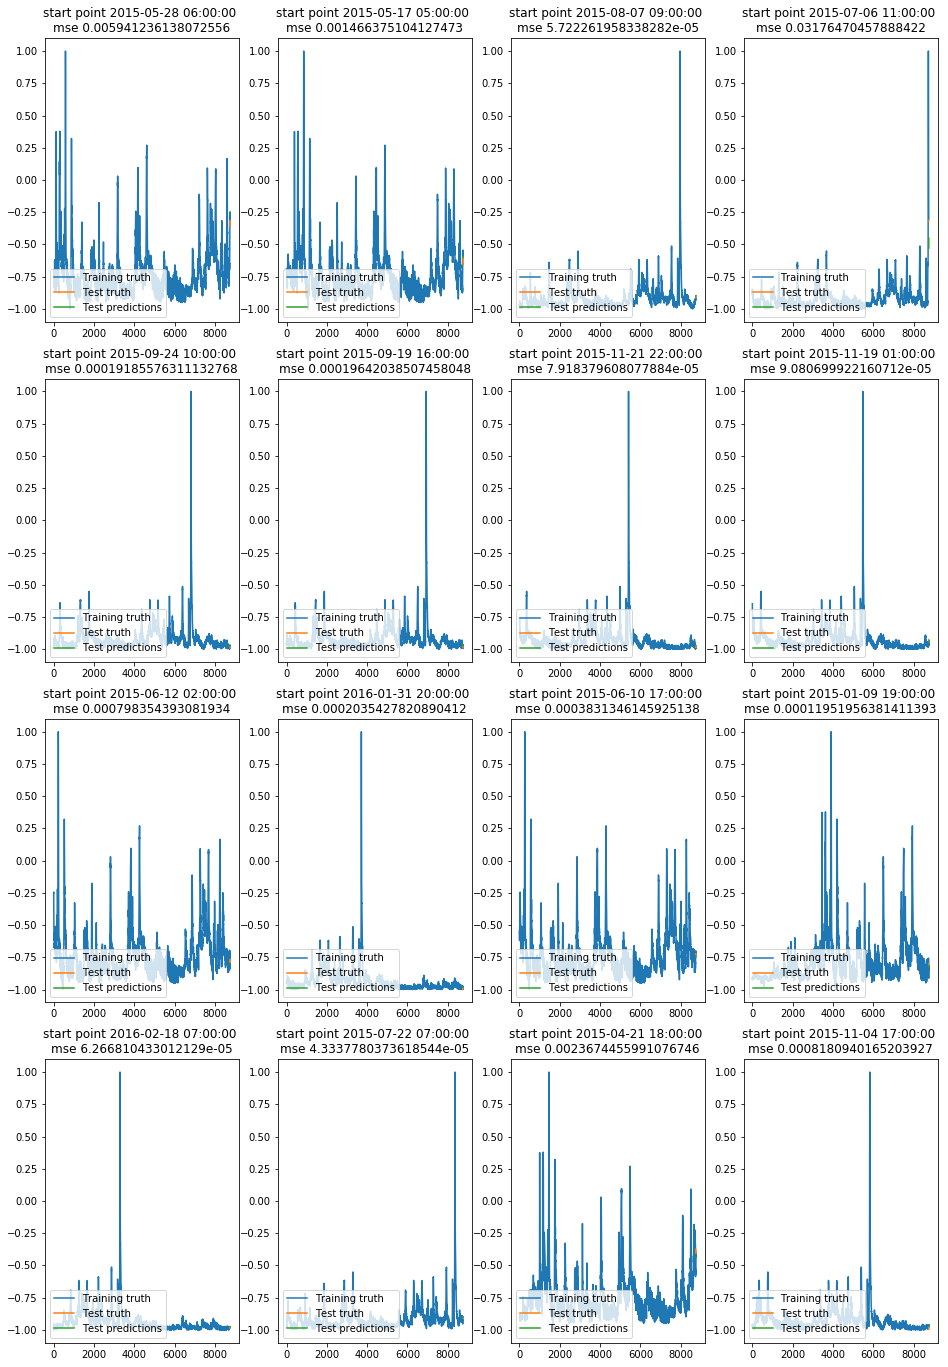

In [48]:
plot_index = 1
plt.figure(figsize=(16,24))
for ts_start in np.random.randint(0,10000,16):
    plt.subplot(4,4,plot_index)
    plot_index = plot_index + 1
    ts_train,ts_test = divide_ts_for_train_test(ts_start,TS_LENGTH)
#     print(ts_train.shape,ts_test.shape)
    model.compile(loss='mse', optimizer='adam')
    
    x_train_seq,y_train_seq = get_batch_samples(ts_train,'all')
    print(x_train_seq.shape,y_train_seq.shape)
    model.fit(x_train_seq,y_train_seq,epochs=20,batch_size=BATCH_SIZE,validation_split=0.2)
    
    y_hat_seq = model.predict(ts_train[-N:].reshape(1,N,1))
    ts_test = ts_test.reshape(-1)
    
    l1, = plt.plot(range(TS_LENGTH - M), ts_train.reshape(-1), label = 'Training truth')
    l2, = plt.plot(range(TS_LENGTH - M, TS_LENGTH), ts_test.reshape(-1), label = 'Test truth')
    l3, = plt.plot(range(TS_LENGTH - M, TS_LENGTH), y_hat_seq.reshape(-1), label = 'Test predictions')
    plt.title(f'start point {df.ix[ts_start,"ds"]} \nmse {mean_squared_error(y_hat_seq.reshape(-1),ts_test.reshape(-1))}')
    plt.legend(handles = [l1, l2, l3], loc = 'lower left')
plt.show()

In [9]:
import keras
model.compile(loss='mse', optimizer='adam')
keras.utils.plot_model(model, show_shapes=True)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 1)        0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 48, 48)       19200       input_1[0][0]                    
__________________________________________________________________________________________________
private__optional_input_place_h (2,)                 0                                            
__________________________________________________________________________________________________
private__optional_input_place_h (2,)                 0                                            
__________________________________________________________________________________________________
recurrent_

In [31]:
# TRAIN_RECORDS = 1000
scaler = MinMaxScaler((-1,1))
# train_set = df['zhexi_in'][:TRAIN_RECORDS]
# test_set = df['zhexi_in'][TRAIN_RECORDS:]
# train_set = pd.DataFrame(scaler.fit_transform(np.array(train_set).reshape(-1,1)).reshape(-1),index=train_set.index,columns=['current']) 
# test_set =  pd.DataFrame(scaler.transform(np.array(test_set).reshape(-1,1)).reshape(-1),index=test_set.index,columns=['current'])
ts = pd.DataFrame(scaler.fit_transform(np.array(df['zhexi_in']).reshape(-1,1)).reshape(-1),index=df.index,columns=['current'])

In [32]:
def make_former_Npoints_time_series(df,n):
    for i in range(1,n+1):
        df[f'current_before_{n-i+1}'] = df['current'].shift(n-i+1)
    return df.dropna()
# make_former_Npoints_time_series(ts,N)

def make_next_Mpoints_time_series(df,m):
    for i in range(1,m):
        df[f'current_next_{i}'] = df['current'].shift(-i)
    return df.dropna()
# make_next_Mpoints_time_series(ts,M)

In [33]:
M = 1 * 3
N = 1 * 3
ts = make_next_Mpoints_time_series(ts,M)
ts = make_former_Npoints_time_series(ts,N)
ts = pd.concat((ts[ts.columns[M:]],ts[ts.columns[:M]]),axis=1)
ts.head(2)

,current_before_3,current_before_2,current_before_1,current,current_next_1,current_next_2
3,-0.964450,-0.961909,-0.96248,-0.964150,-0.965671,-0.964560
4,-0.961909,-0.962480,-0.96415,-0.965671,-0.964560,-0.966197


In [107]:
# x_train_seq_df,y_train_seq_df = ts[:TRAIN_RECORDS][ts.columns[:N]],ts[:TRAIN_RECORDS][ts.columns[N:]]
# x_test_seq_df,y_test_seq_df = ts[TRAIN_RECORDS:][ts.columns[:N]],ts[TRAIN_RECORDS:][ts.columns[N:]]

In [110]:
# x_train_seq_df.shape,y_train_seq_df.shape,x_test_seq_df.shape,y_test_seq_df.shape

In [116]:
# x_train_seq = np.array(x_train_seq_df).reshape(-1,N,1)
# y_train_seq = np.array(y_train_seq_df).reshape(-1,M,1)
# x_test_seq  = np.array(x_test_seq_df).reshape(-1,N,1)
# y_test_seq  = np.array(y_test_seq_df).reshape(-1,M,1)

In [22]:
#model.summary()

In [67]:
# def plot_result(start_points):
#     row = int(len(start_points) / 4) + 1
#     col = 4
#     plt.figure(figsize=(row*4,col*3.5))
#     for i in range(16):
#         start_point = start_points[i]
#         #print(start_point)
#         plt.subplot(row,col,i+1)
#         plt.plot(y_hat_seq[start_point].reshape(-1))
#         plt.plot(y_test_seq[start_point].reshape(-1))
#         plt.title(f'point: {start_point}')
#         plt.legend(('pre','real'))
#     plt.show()

In [97]:
import build_model_basic as bmb
from build_model_basic import *

## Parameters
bmb.learning_rate = 0.01
bmb.lambda_l2_reg = 0.003  

## Network Parameters
# length of input signals
bmb.input_seq_len = N 
# length of output signals
bmb.output_seq_len = M
# size of LSTM Cell
bmb.hidden_dim = 64 
# num of input signals
bmb.input_dim = 1
# num of output signals
bmb.output_dim = 1
# num of stacked lstm layers 
bmb.num_stacked_layers = 1 
# gradient clipping - to avoid gradient exploding
bmb.GRADIENT_CLIPPING = 2.5 

In [96]:
import os
total_iteractions = 50
batch_size = 16
KEEP_RATE = 0.5
train_losses = []
val_losses = []

rnn_model = build_graph(feed_previous=False)

saver = tf.train.Saver()

init = tf.global_variables_initializer()
with tf.Session() as sess:

    sess.run(init)
    
    for i in range(total_iteractions):
        for j in range(int((TS_LENGTH - M -N) // batch_size)):
            losses = []
            batch_input, batch_output = get_batch_samples(ts[:TS_LENGTH - M],batch_size=batch_size)
#             print(batch_output)
            feed_dict = {rnn_model['enc_inp'][t]: batch_input[:,t].reshape(-1,input_dim) for t in range(N)}
            feed_dict.update({rnn_model['target_seq'][t]: batch_output[:,t].reshape(-1,output_dim) for t in range(M)})
#             print(feed_dict is None)
            _, loss_t = sess.run([rnn_model['train_op'], rnn_model['loss']], feed_dict)
            losses.append(loss_t)
        loss = np.mean(losses)
        print(loss)
        train_losses.append(loss)
        
    temp_saver = rnn_model['saver']()
    save_path = temp_saver.save(sess, os.path.join('./', 'univariate_ts_model0'))
        
print("Checkpoint saved at: ", save_path)

121920.375
136551.98
103648.805
63008.883
65982.875
42546.324
29322.979
19504.342
15481.28
14077.79
14693.463
9044.99
9559.582
10665.896
6568.4727
11590.95
7475.087
12424.854
5416.0103
7682.8643
21370.88
6325.6343
6858.5654
6421.3076
7521.409
10620.719
9825.872
10602.956
3610.9573
5507.6807
4902.1533
5228.7856
9510.894
5602.331
5606.806
2623.6755
6766.0977
3893.598
2981.274
4724.919
2362.8315
2747.7837
2999.649
5650.4414
3594.1453
5200.3774
3259.2678
4098.6255
7791.4775
5479.805
Checkpoint saved at:  ./univariate_ts_model0


In [98]:
test_seq_input = ts[TS_LENGTH - M - N:TS_LENGTH - M]

rnn_model = build_graph(feed_previous=True)

init = tf.global_variables_initializer()
with tf.Session() as sess:

    sess.run(init)
    
    saver = rnn_model['saver']().restore(sess, os.path.join('./', 'univariate_ts_model0'))
    
    feed_dict = {rnn_model['enc_inp'][t]: test_seq_input[t].reshape(1,1) for t in range(input_seq_len)}
    feed_dict.update({rnn_model['target_seq'][t]: np.zeros([1, output_dim]) for t in range(output_seq_len)})
    final_preds = sess.run(rnn_model['reshaped_outputs'], feed_dict)
    
    final_preds = np.concatenate(final_preds, axis = 1)

INFO:tensorflow:Restoring parameters from ./univariate_ts_model0


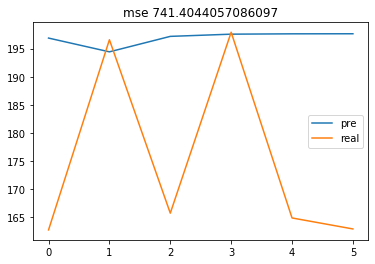

In [99]:
from sklearn.metrics import mean_squared_error
y_hat = final_preds.reshape(-1)
real = ts[-M:]
plt.plot(y_hat)
plt.plot(real)
plt.title(f'mse {mean_squared_error(y_hat,real)}')
plt.legend(('pre','real'))
plt.show()

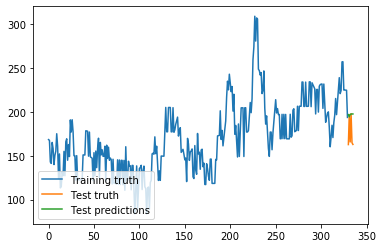

In [100]:
l1, = plt.plot(range(TS_LENGTH - M), ts[:TS_LENGTH - M], label = 'Training truth')
l2, = plt.plot(range(TS_LENGTH - M, TS_LENGTH), ts[TS_LENGTH - M:], label = 'Test truth')
l3, = plt.plot(range(TS_LENGTH - M, TS_LENGTH), final_preds.reshape(-1), label = 'Test predictions')
plt.legend(handles = [l1, l2, l3], loc = 'lower left')
plt.show()